<a href="https://colab.research.google.com/github/matteonerini/sudoku-generator-and-solver/blob/main/futoshiki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Futoshiki Generator and Solver

Futoshiki is a logic-based puzzle in which the objective is to fill a $d$x$d$ grid with numerical digits from 1 to $d$, according to the following rules:
- Each row and each column must contain all the digits from 1 to $d$.
- The numbers must satisfy the inequality signs present on the board.

In this notebook, we propose simple yet interesting recursive algorithms to find all the solutions of a given Futoshiki, and to generate new puzzles such that they have a unique solution.

In [10]:
# Import relevant libraries
import numpy as np
from random import randint, shuffle
import matplotlib.pyplot as plt

# Utility variables
d = 4
numbers = list(range(1,d+1))
cells = list(range((d*2-1)**2))

# Check if the cell 'board[y,x]' can assume the value 'n'
def possible(board,y,x,n):
    # Check if 'n' is already in row 'y' or in column 'x'
    for i in range(d):
        if board[y][i*2] == str(n) or board[i*2][x] == str(n):
            return False
    # Check the north inequality if present
    try:
        if board[y-1][x] == '<' and board[y-2][x] != ' ' and int(board[y-2][x]) > n:
            return False
        if board[y-1][x] == '>' and board[y-2][x] != ' ' and int(board[y-2][x]) < n:
            return False
    except IndexError:
        pass
    # Check the south inequality if present
    try:
        if board[y+1][x] == '<' and board[y+2][x] != ' ' and int(board[y+2][x]) < n:
            return False
        if board[y+1][x] == '>' and board[y+2][x] != ' ' and int(board[y+2][x]) > n:
            return False
    except IndexError:
        pass
    # Check the west inequality if present
    try:
        if board[y][x-1] == '<' and board[y][x-2] != ' ' and int(board[y][x-2]) > n:
            return False
        if board[y][x-1] == '>' and board[y][x-2] != ' ' and int(board[y][x-2]) < n:
            return False
    except IndexError:
        pass
    # Check the east inequality if present
    try:
        if board[y][x+1] == '<' and board[y][x+2] != ' ' and int(board[y][x+2]) < n:
            return False
        if board[y][x+1] == '>' and board[y][x+2] != ' ' and int(board[y][x+2]) > n:
            return False
    except IndexError:
        pass
    return True

# Backtracking algorithm implementation to solve a Futoshiki
def solve(board):
    global board_solved
    global n_solutions
    for y in range(d):
        for x in range(d):
            if board[y*2][x*2] == ' ':
                for n in range(1,d+1):
                    if possible(board,y*2,x*2,n):
                        board[y*2][x*2] = n
                        solve(board)
                        board[y*2][x*2] = ' '
                return
    print(board)
    #input("More solutions?")
    #board_solved = np.copy(board)
    n_solutions+=1

# Faster implementation of the backtraking algorithm whose objective is to
# determine if the Futoshiki does not have a unique solution
def solve_fast(board):
    global board_solved
    global n_solutions
    global end_solver
    for y in range(d):
        for x in range(d):
            if board[y*2][x*2] == ' ':
                for n in range(1,d+1):
                    if possible(board,y*2,x*2,n):
                        board[y*2][x*2] = n
                        solve_fast(board)
                        if not(end_solver):
                            board[y*2][x*2] = ' '
                return
    #print(board)
    n_solutions+=1
    if n_solutions == 2:
        end_solver = True

# Randomly fill an empty board with dimension d
def fill(board):
    global board_filled
    d = (len(board)+1)//2
    for y in range(d):
        for x in range(d):
            if board[y*2][x*2] == ' ':
                shuffle(numbers)
                for n in numbers:
                    if possible(board,y*2,x*2,n):
                        board[y*2][x*2] = n
                        if ' ' in board[::2, ::2]:
                            fill(board)
                            board[y*2][x*2] = ' '
                        else:
                            board_filled = np.copy(board)
                return

# Create a Futoshiki from a fully filled board
def create(board):
    global n_solutions
    global end_solver
    shuffle(cells)
    for i in range((d*2-1)**2):
        y = cells[i] // (d*2-1)
        x = cells[i] % (d*2-1)
        backup = board[y][x]
        board[y][x] = ' '
        board_copy = np.copy(board)
        n_solutions = 0
        end_solver = False
        solve_fast(board_copy)
        if n_solutions != 1:
            board[y][x] = backup
        print('\b\b\b\b{:03d}'.format(i+1) )

# Plot the board to create an enjoyable Futoshiki
def board2pdf(board):
    # Create a figure
    fig, ax = plt.subplots()
    im = ax.imshow(np.zeros((d*2-1,d*2-1), dtype=int),cmap='binary', vmin=255, vmax=255)
    # Add the clues to the figure modifying the vertical inequalities
    for i in range(d*2-1):
        for j in range(d*2-1):
            if i % 2 == 1:
                if board[i,j] == '>':
                    board[i,j] = u"\u2228"
                if board[i,j] == '<':
                    board[i,j] = u"\u2227"
    for i in range(d*2-1):
        for j in range(d*2-1):
            text = ax.text(j, i, board[i,j],
                           ha='center', va='center', color='k')
    # Add the lines
    for i in range(d*2):
        for j in range(d):
            plt.axhline(y=i-0.5, xmin=(j*2)/(d*2-1), xmax=(j*2+1)/(d*2-1), linewidth=3, color='k')
            plt.axvline(x=i-0.5, ymin=(j*2)/(d*2-1), ymax=(j*2+1)/(d*2-1), linewidth=3, color='k')
    # Plot the figure without axis
    plt.axis('off')
    plt.savefig('futoshiki.pdf', bbox_inches='tight')
    plt.savefig('futoshiki.png', bbox_inches='tight')

## Futoshiki Resolution

The function `solve`, implementing the backtraking algorithm, is called to solve a given Futoshiki, specified by the variable `board`. Thus, all the possible solutions, i.e. the complete grids, are showed.

In [11]:
# Input board
d = 4
board = np.array([['1', ' ', ' ', ' ', ' ', ' ', ' '],
                  [' ', ' ', '<', ' ', ' ', ' ', '<'],
                  [' ', ' ', ' ', ' ', ' ', ' ', ' '],
                  [' ', ' ', ' ', ' ', ' ', ' ', ' '],
                  [' ', ' ', ' ', ' ', ' ', ' ', ' '],
                  [' ', ' ', ' ', ' ', ' ', ' ', '<'],
                  [' ', ' ', ' ', ' ', ' ', '>', ' ']])

# Utility variables
numbers = list(range(1,d+1))
cells = list(range((d*2-1)**2))

n_solutions = 0
print('Solution(s):\n')
solve(board)
#print(board_solved)
print('\nNumber of solutions:', n_solutions)

Solution(s):

[['1' ' ' '2' ' ' '4' ' ' '3']
 [' ' ' ' '<' ' ' ' ' ' ' '<']
 ['2' ' ' '3' ' ' '1' ' ' '4']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ']
 ['3' ' ' '4' ' ' '2' ' ' '1']
 [' ' ' ' ' ' ' ' ' ' ' ' '<']
 ['4' ' ' '1' ' ' '3' '>' '2']]

Number of solutions: 1


## Futoshiki Generation

The generation of a Futoshiki with unique solution takes place according to the following steps:
1. Generate a completely filled board which satisfies the Futoshiki rules with the function `fill`. This will be the unique solution of our Futoshiki.
2. Iteratively, remove one random element from the board.
3. Find the number of solutions of the new obtained board with the function `solve_fast`, a simplified Futoshiki solver.
4. If the board has no longer a unique solution, reinsert the removed element.
5. Return to Step 2 until a certain number of iteraction is reached. The higher this number, the more difficult is the generated Futoshiki since more cells are removed.

Filled board randomly generated:
[['1' ' ' '6' ' ' '2' ' ' '4' ' ' '5' ' ' '3']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 ['5' ' ' '4' ' ' '1' ' ' '3' ' ' '2' ' ' '6']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 ['6' ' ' '2' ' ' '3' ' ' '1' ' ' '4' ' ' '5']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 ['3' ' ' '5' ' ' '4' ' ' '6' ' ' '1' ' ' '2']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 ['4' ' ' '3' ' ' '5' ' ' '2' ' ' '6' ' ' '1']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 ['2' ' ' '1' ' ' '6' ' ' '5' ' ' '3' ' ' '4']] 

Complete board:
[['1' '<' '6' '>' '2' '<' '4' '<' '5' '>' '3']
 ['<' ' ' '>' ' ' '>' ' ' '>' ' ' '>' ' ' '<']
 ['5' '>' '4' '>' '1' '<' '3' '>' '2' '<' '6']
 ['<' ' ' '>' ' ' '<' ' ' '>' ' ' '<' ' ' '>']
 ['6' '>' '2' '<' '3' '>' '1' '<' '4' '<' '5']
 ['>' ' ' '<' ' ' '<' ' ' '<' ' ' '>' ' ' '>']
 ['3' '<' '5' '>' '4' '<' '6' '>' '1' '<' '2']
 ['<' ' ' '>' ' ' '<' ' ' '>' ' ' '<' ' ' '>']
 ['4' '>' '3' '<' '5' '>' '2' '<' '6' '>' '1']
 ['>' ' 

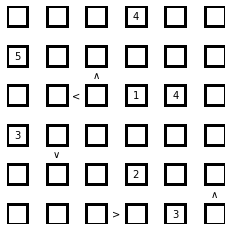

In [12]:
# Insert the dimension 'd'. Possible values: 4, 5, 6, 7
d = 6

# Utility variables
numbers = list(range(1,d+1))
cells = list(range((d*2-1)**2))
board_empty = np.full((d*2-1, d*2-1), ' ')

# Fill randomly the empty board and complete it with the inequalities clues
fill(board_empty)
print('Filled board randomly generated:')
print(board_filled, '\n')
for i in range(d):
    for j in range(d):
        try:
            board_filled[j*2+1,i*2] = '<' if board_filled[j*2,i*2] < board_filled[j*2+2,i*2] else '>'
        except IndexError:
            pass
        try:
            board_filled[j*2,i*2+1] = '<' if board_filled[j*2,i*2] < board_filled[j*2,i*2+2] else '>'
        except IndexError:
            pass
print('Complete board:')
print(board_filled, '\n')

# Create a Futoshiki
print('Generated Futoshiki:')
print('Progress (/', (d*2-1)**2, '):   ')
create(board_filled)
print(board_filled)
print('Number of clues:', np.count_nonzero(board_filled), '\n')

# Solve the created Futoshiki
n_solutions = 0
print('Solution:')
solve(board_filled)
#print(board_solved)
print('Number of solutions:', n_solutions, '\n')

# Print the created Futoshiki
print('Printed generated Futoshiki:')
board2pdf(board_filled)